# Stock Trend Prediction

In [167]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [168]:
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL',start=start , end=end)
df.head()

C:\Users\air73\AppData\Local\Temp\ipykernel_8364\3593053562.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL',start=start , end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431895,6.446621,6.382907,6.414463,493729600
2010-01-05,6.443016,6.479381,6.409054,6.449628,601904800
2010-01-06,6.340533,6.468564,6.333921,6.443018,552160000
2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [169]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.667618,68.728065,67.789928,67.828615,98572000
2019-12-24,68.732895,68.882809,68.406488,68.834449,48478800
2019-12-26,70.096573,70.113500,68.836863,68.865876,93121200
2019-12-27,70.069992,71.078249,69.663791,70.389153,146266000
2019-12-30,70.485863,70.768757,68.962605,69.987781,144114400


In [170]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431895,6.446621,6.382907,6.414463,493729600
1,2010-01-05,6.443016,6.479381,6.409054,6.449628,601904800
2,2010-01-06,6.340533,6.468564,6.333921,6.443018,552160000
3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [171]:
df = df.drop(['Date'] , axis=1)
df.head()


C:\Users\air73\AppData\Local\Temp\ipykernel_8364\372956535.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'] , axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431895,6.446621,6.382907,6.414463,493729600
1,6.443016,6.479381,6.409054,6.449628,601904800
2,6.340533,6.468564,6.333921,6.443018,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370886,6.371488,6.283129,6.320395,447610800


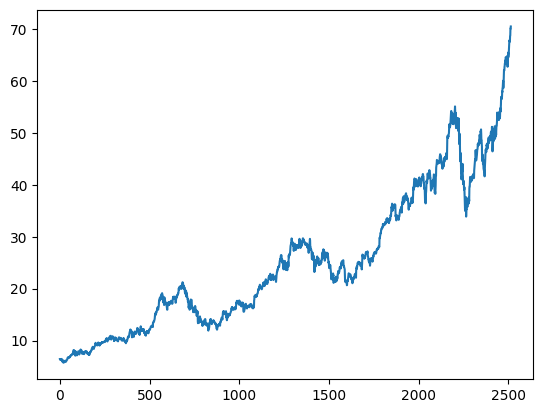

In [172]:
plt.plot(df.Close)

In [173]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431895,6.446621,6.382907,6.414463,493729600
1,6.443016,6.479381,6.409054,6.449628,601904800
2,6.340533,6.468564,6.333921,6.443018,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370886,6.371488,6.283129,6.320395,447610800
...,...,...,...,...,...
2510,68.667618,68.728065,67.789928,67.828615,98572000
2511,68.732895,68.882809,68.406488,68.834449,48478800
2512,70.096573,70.113500,68.836863,68.865876,93121200


In [174]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.137910
2511,57.335283
2512,57.571940
2513,57.799542


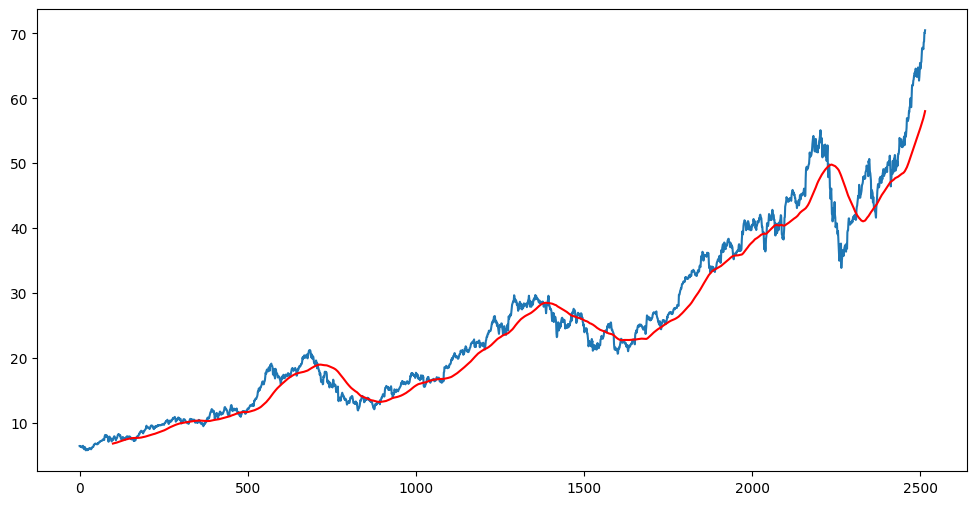

In [175]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [176]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.096148
2511,52.223417
2512,52.356548
2513,52.487129


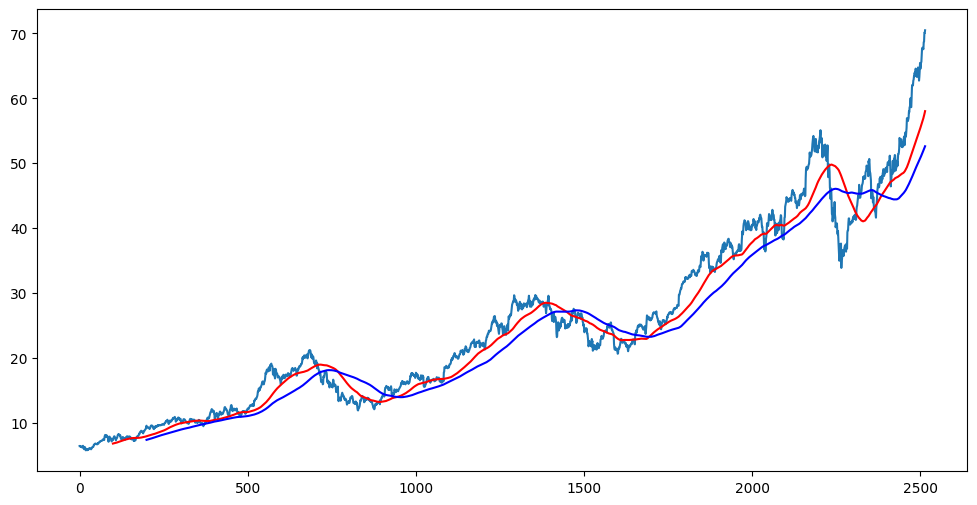

In [177]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'b')

In [178]:
df.shape

(2515, 5)

## 70% data if for trainning and 30% data is for testing

In [179]:
data_train = pd.DataFrame(df['Close'][ : int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7) : int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1760, 1)
(755, 1)


In [180]:
data_train.head()

Ticker,AAPL
0,6.431895
1,6.443016
2,6.340533
3,6.328811
4,6.370886


In [181]:
data_test.head()

Ticker,AAPL
1760,26.961208
1761,26.751026
1762,26.827246
1763,26.797218
1764,26.933493


In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [183]:
data_train_array = scaler.fit_transform(data_train)

In [184]:
data_train_array

array([[0.02759991],
       [0.02806497],
       [0.02377925],
       ...,
       [0.88408442],
       [0.89123191],
       [0.88640249]])

In [185]:
data_train_array.shape

(1760, 1)

In [186]:
x_train = []
y_train =[]

for i in range(100 , data_train_array.shape[0]):
    x_train.append(data_train_array[i-100 : i])
    y_train.append(data_train_array[i,0])

In [187]:
x_train

[array([[2.75999103e-02],
        [2.80649695e-02],
        [2.37792546e-02],
        [2.32890502e-02],
        [2.50486057e-02],
        [2.26984039e-02],
        [1.96945031e-02],
        [2.33769691e-02],
        [2.18437017e-02],
        [1.74448228e-02],
        [2.88945064e-02],
        [2.47344385e-02],
        [2.01343571e-02],
        [7.16394880e-03],
        [1.38501960e-02],
        [1.74573058e-02],
        [1.98956060e-02],
        [9.09938211e-03],
        [1.25228173e-05],
        [3.36821908e-03],
        [4.78842222e-03],
        [9.02400592e-03],
        [0.00000000e+00],
        [4.28573480e-03],
        [2.60161528e-03],
        [5.20329039e-03],
        [3.85840363e-03],
        [8.32011591e-03],
        [1.04694142e-02],
        [1.42649844e-02],
        [1.31967363e-02],
        [1.36742983e-02],
        [1.20906205e-02],
        [1.05196052e-02],
        [6.29664400e-03],
        [1.08212695e-02],
        [1.25054488e-02],
        [1.57982518e-02],
        [2.1

In [188]:
y_train

[np.float64(0.07704374172207881),
 np.float64(0.08148026878592088),
 np.float64(0.08644480807586116),
 np.float64(0.09036614484273295),
 np.float64(0.08932302208283169),
 np.float64(0.08032406179571619),
 np.float64(0.07401475538830107),
 np.float64(0.07199126354029614),
 np.float64(0.06428685945690057),
 np.float64(0.07347432004891077),
 np.float64(0.07724486454818355),
 np.float64(0.07821277064141155),
 np.float64(0.08501200236258502),
 np.float64(0.09451380959654596),
 np.float64(0.10032044852424185),
 np.float64(0.10308515954428113),
 np.float64(0.09818375280118272),
 np.float64(0.10280889981467031),
 np.float64(0.09918908776062116),
 np.float64(0.09671323905061094),
 np.float64(0.09382250222638941),
 np.float64(0.09583345131635149),
 np.float64(0.0805880379975776),
 np.float64(0.0747563733761715),
 np.float64(0.07092301538272563),
 np.float64(0.06898756213052207),
 np.float64(0.07111147580603674),
 np.float64(0.08373014844324231),
 np.float64(0.08300117291737372),
 np.float64(0.08

### now we have to convert x_train and y_train into numpy array

In [189]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [190]:
x_train.shape

(1660, 100, 1)

## Model Creation

In [191]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [192]:
model = Sequential()
model.add(LSTM(units=50 , activation='relu' , return_sequences=True , input_shape = (x_train.shape[1] , 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.3))


model.add(LSTM(units=80 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.4))


model.add(LSTM(units=120 , activation='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units=1))

c:\Users\air73\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [193]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs= 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - loss: 0.1110
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 0.0119
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 0.0098
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - loss: 0.0072
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - loss: 0.0086
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0087
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 0.0068
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0063
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - loss: 0.0072
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - loss: 0.0077
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - loss: 0.0067
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0061
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - loss: 0.0057
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - loss: 0.0063
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [195]:
model.save('keras_model.h5')

In [196]:
past_100_days = data_train.tail(100)

In [197]:
final_df = pd.concat([past_100_days , data_test], ignore_index=True)

In [198]:
final_df.head()

Ticker,AAPL
0,24.902439
1,25.003551
2,24.817415
3,24.801327
4,24.858782


In [199]:
input_data = scaler.fit_transform(final_df)

In [200]:
input_data

array([[0.02573553],
       [0.02789662],
       [0.02391829],
       [0.02357443],
       [0.02480243],
       [0.03118715],
       [0.03069595],
       [0.02991019],
       [0.02922266],
       [0.03059767],
       [0.02642317],
       [0.02809279],
       [0.02406574],
       [0.02180652],
       [0.01871229],
       [0.01812293],
       [0.01409564],
       [0.01458671],
       [0.01768098],
       [0.02259221],
       [0.02244488],
       [0.02568644],
       [0.01173809],
       [0.        ],
       [0.01134523],
       [0.02367272],
       [0.04243417],
       [0.06109737],
       [0.05790493],
       [0.05132384],
       [0.0512746 ],
       [0.05117656],
       [0.05643164],
       [0.04705082],
       [0.04788583],
       [0.04891721],
       [0.05314116],
       [0.04444777],
       [0.04872088],
       [0.04611756],
       [0.04847519],
       [0.04872088],
       [0.05284626],
       [0.05368115],
       [0.06345492],
       [0.06468268],
       [0.06979056],
       [0.068

In [201]:
input_data.shape

(855, 1)

In [202]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i , 0])

In [203]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


## Now making prediction

In [204]:
y_prediction = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step


In [205]:
y_prediction

array([[0.13487732],
       [0.13487592],
       [0.13487452],
       [0.13487315],
       [0.13487184],
       [0.13487059],
       [0.13486941],
       [0.1348683 ],
       [0.13486728],
       [0.1348665 ],
       [0.134866  ],
       [0.13486579],
       [0.134866  ],
       [0.1348668 ],
       [0.13486832],
       [0.13487062],
       [0.13487375],
       [0.13487774],
       [0.13488364],
       [0.13489297],
       [0.13490704],
       [0.13492653],
       [0.1349512 ],
       [0.13499632],
       [0.13508818],
       [0.13525411],
       [0.13552077],
       [0.13591361],
       [0.13646373],
       [0.1372081 ],
       [0.1381701 ],
       [0.13936126],
       [0.14079103],
       [0.14246634],
       [0.1443816 ],
       [0.14651915],
       [0.14886063],
       [0.15138482],
       [0.15405777],
       [0.15683901],
       [0.15968733],
       [0.16256247],
       [0.16545135],
       [0.16834071],
       [0.17122227],
       [0.17408238],
       [0.1769051 ],
       [0.179

In [206]:
y_prediction.shape

(755, 1)

## Scaling up the data  
## copy scaler.scale_ value  
## Divide the y_prediction and y_test with this value 

In [218]:
scaler.scale_

array([0.02137322])

In [217]:
y_prediction

array([[ 5614.0415],
       [ 5613.9834],
       [ 5613.925 ],
       [ 5613.8677],
       [ 5613.813 ],
       [ 5613.761 ],
       [ 5613.712 ],
       [ 5613.6655],
       [ 5613.623 ],
       [ 5613.591 ],
       [ 5613.57  ],
       [ 5613.5615],
       [ 5613.57  ],
       [ 5613.6035],
       [ 5613.667 ],
       [ 5613.762 ],
       [ 5613.8926],
       [ 5614.0586],
       [ 5614.304 ],
       [ 5614.6924],
       [ 5615.2783],
       [ 5616.0894],
       [ 5617.1167],
       [ 5618.9946],
       [ 5622.818 ],
       [ 5629.7246],
       [ 5640.8237],
       [ 5657.175 ],
       [ 5680.0728],
       [ 5711.056 ],
       [ 5751.0977],
       [ 5800.6777],
       [ 5860.1895],
       [ 5929.9214],
       [ 6009.6406],
       [ 6098.613 ],
       [ 6196.0728],
       [ 6301.1377],
       [ 6412.395 ],
       [ 6528.1597],
       [ 6646.7163],
       [ 6766.3896],
       [ 6886.634 ],
       [ 7006.899 ],
       [ 7126.8384],
       [ 7245.8857],
       [ 7363.377 ],
       [ 7478

In [219]:
scale_factor = 1/0.00490153


In [220]:
y_test = y_test * scale_factor

In [221]:
y_prediction = y_prediction * scale_factor

In [223]:
y_prediction

array([[1145365.1],
       [1145353.2],
       [1145341.4],
       [1145329.6],
       [1145318.5],
       [1145308. ],
       [1145297.9],
       [1145288.4],
       [1145279.8],
       [1145273.1],
       [1145268.9],
       [1145267.2],
       [1145268.9],
       [1145275.8],
       [1145288.8],
       [1145308.1],
       [1145334.8],
       [1145368.6],
       [1145418.8],
       [1145497.9],
       [1145617.5],
       [1145782.9],
       [1145992.5],
       [1146375.6],
       [1147155.6],
       [1148564.8],
       [1150829.1],
       [1154165.1],
       [1158836.6],
       [1165157.9],
       [1173327. ],
       [1183442.2],
       [1195583.8],
       [1209810.2],
       [1226074.4],
       [1244226.4],
       [1264109.9],
       [1285545.1],
       [1308243.5],
       [1331861.6],
       [1356049.2],
       [1380464.8],
       [1404996.8],
       [1429533. ],
       [1454002.8],
       [1478290.6],
       [1502260.9],
       [1525723.1],
       [1548450.4],
       [1570259.6],


In [224]:
y_test

array([ 592208.73204449,  554060.81376363,  567894.60956766,
        562444.65968295,  587178.35525641,  641674.73846171,
        686949.86046654,  691980.58343704,  718810.06739912,
        697849.41405354,  689047.03358485,  729291.43261917,
        728871.85952254,  720067.74814174,  729291.43261917,
        732644.555568  ,  728033.0595117 ,  808102.28448372,
        810617.29978655,  811036.87288318,  797622.65017578,
        785883.60421309, 1096099.05816017, 1086876.75841243,
       1109932.8539642 , 1160658.27203616, 1212638.94757379,
       1234019.174016  , 1274017.4373476 , 1261385.93309852,
       1310645.96097407, 1383485.51222493, 1404113.48426204,
       1397377.81285844, 1412955.67570937, 1454216.12015509,
       1471479.199041  , 1447056.72146579, 1452534.36594434,
       1463899.88107264, 1466428.05130754, 1584314.24416407,
       1549371.97511985, 1583893.97870259, 1565366.98779044,
       1572945.61339396, 1551053.72933061, 1537578.92469918,
       1556947.83126398,

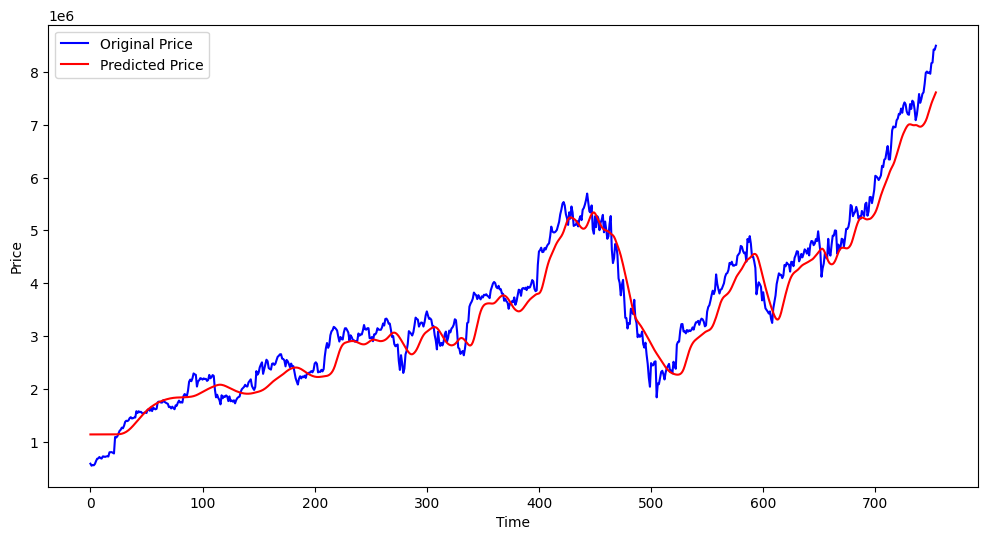

In [225]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='Original Price')
plt.plot(y_prediction , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()